In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

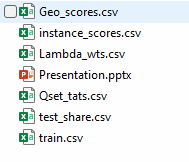

In [2]:
#geo = pd.read_csv('Geo_scores.csv')
#instance = pd.read_csv("instance_scores.csv")
#lambdawts = pd.read_csv("Lambda_wts.csv")
#qset = pd.read_csv("Qset_tats.csv")
#test_data = pd.read_csv("test_share.csv")
#train_data = pd.read_csv('train.csv')

In [3]:
geo = pd.read_csv(r"C:\Users\hindo\Banking_Domain_Project\Geo_scores.csv")
instance = pd.read_csv(r"C:\Users\hindo\Banking_Domain_Project\instance_scores.csv")
lambdawts = pd.read_csv(r"C:\Users\hindo\Banking_Domain_Project\Lambda_wts.csv")
qset = pd.read_csv(r"C:\Users\hindo\Banking_Domain_Project\Qset_tats.csv")
test_data = pd.read_csv(r"C:\Users\hindo\Banking_Domain_Project\test_share.csv")
train_data = pd.read_csv(r"C:\Users\hindo\Banking_Domain_Project\train.csv")

In [4]:
instance.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [5]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape)
print()
print(qset.shape)
print()
print(test_data.shape)
print()
print(train_data.shape)

(1424035, 2)

(1424035, 2)

(1400, 2)

(1424035, 2)

(56962, 27)

(227845, 28)


In [6]:
print(geo.columns)
print()
print(instance.columns)
print()
print(lambdawts.columns)
print()
print(qset.columns)
print()
print(test_data.columns)
print()
print(train_data.columns)

Index(['id', 'geo_score'], dtype='object')

Index(['id', 'instance_scores'], dtype='object')

Index(['Group', 'lambda_wt'], dtype='object')

Index(['id', 'qsets_normalized_tat'], dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT'],
      dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target'],
      dtype='object')


In [7]:
print("geo id", geo['id'].nunique())
print()
print("instance id", instance['id'].nunique())
print()
print("Lambda Group", lambdawts['Group'].nunique())
print()
print("qset id", qset['id'].nunique())
print()
print("Test id", test_data['id'].nunique())
print()
print("Train Id", train_data['id'].nunique())
print()
print("Test Group", test_data['Group'].nunique())
print()
print("Train Group",train_data['Group'].nunique())

geo id 284807

instance id 284807

Lambda Group 1400

qset id 284807

Test id 56962

Train Id 227845

Test Group 915

Train Group 1301


In [8]:
train_data['data'] = 'train'
test_data['data'] = 'test'

In [9]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [10]:
test_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [11]:
train_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0,train
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0,train
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0,train
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0,train
227844,22175,Grp143,1.006667,0.553333,0.946667,1.206667,0.406667,0.750000,0.520000,0.756667,...,0.646667,0.636667,0.683333,0.843333,0.580000,0.683333,0.676667,-235.0000,0,train


In [12]:
test_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.616667,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,test


In [13]:
all_data = pd.concat([train_data, test_data], axis=0)

In [14]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [15]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [16]:
all_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [17]:
print("all_data id", all_data['id'].nunique())
print()
print("all_data group", all_data['Group'].nunique())

all_data id 284807

all_data group 1400


In [18]:
print(geo.isnull().sum())
print()
print(instance.isnull().sum())
print()
print(lambdawts.isnull().sum())
print()
print(qset.isnull().sum())
print()
print(all_data.isnull().sum())


id               0
geo_score    71543
dtype: int64

id                 0
instance_scores    0
dtype: int64

Group        0
lambda_wt    0
dtype: int64

id                           0
qsets_normalized_tat    103201
dtype: int64

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64


In [19]:
print(geo.describe())
print()
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01

                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [20]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [21]:
geo.shape

(1424035, 2)

In [22]:
geo = geo.groupby('id').mean()

In [23]:
geo.shape

(284807, 1)

In [24]:
geo

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540
...,...
284802,2.710
284803,0.956
284804,0.060


In [25]:
qset = qset.groupby('id').mean()

In [26]:
qset.shape

(284807, 1)

In [27]:
instance.shape

(1424035, 2)

In [28]:
instance = instance.groupby('id').mean()

In [29]:
instance.shape

(284807, 1)

In [30]:
lambdawts.shape

(1400, 2)

In [31]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape)
print()
print(qset.shape)
print()
print(all_data.shape)


(284807, 1)

(284807, 1)

(1400, 2)

(284807, 1)

(284807, 29)


In [32]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [33]:
all_data = pd.merge(all_data, geo, on='id', how='left')

In [34]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.250


In [35]:
instance.head()

,instance_scores
id,
0,0.09
1,-0.17
2,0.21
3,-0.05
4,0.75


In [36]:
all_data = pd.merge(all_data,instance , on='id', how='left')

In [37]:
qset.head(2)

,qsets_normalized_tat
id,
0,0.214
1,-0.110


In [38]:
all_data.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06


In [39]:
all_data.shape

(284807, 31)

In [40]:
all_data['Group'].nunique()

1400

In [41]:
all_data = pd.merge(all_data,qset , on='id', how='left')

In [42]:
lambdawts.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [43]:
lambdawts.shape

(1400, 2)

In [44]:
lambdawts['Group'].nunique()

1400

In [45]:
all_data = pd.merge(all_data,lambdawts , on='Group', how='left')

In [46]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [47]:
all_data['lambda_wt'].count()

284807

In [48]:
all_data['lambda_wt'].nunique()

1400

In [49]:
train_data = all_data[all_data['data']=='train']
test_data = all_data[all_data['data']=='test']

In [50]:
train_data.shape

(227845, 33)

In [51]:
test_data.shape

(56962, 33)

In [52]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

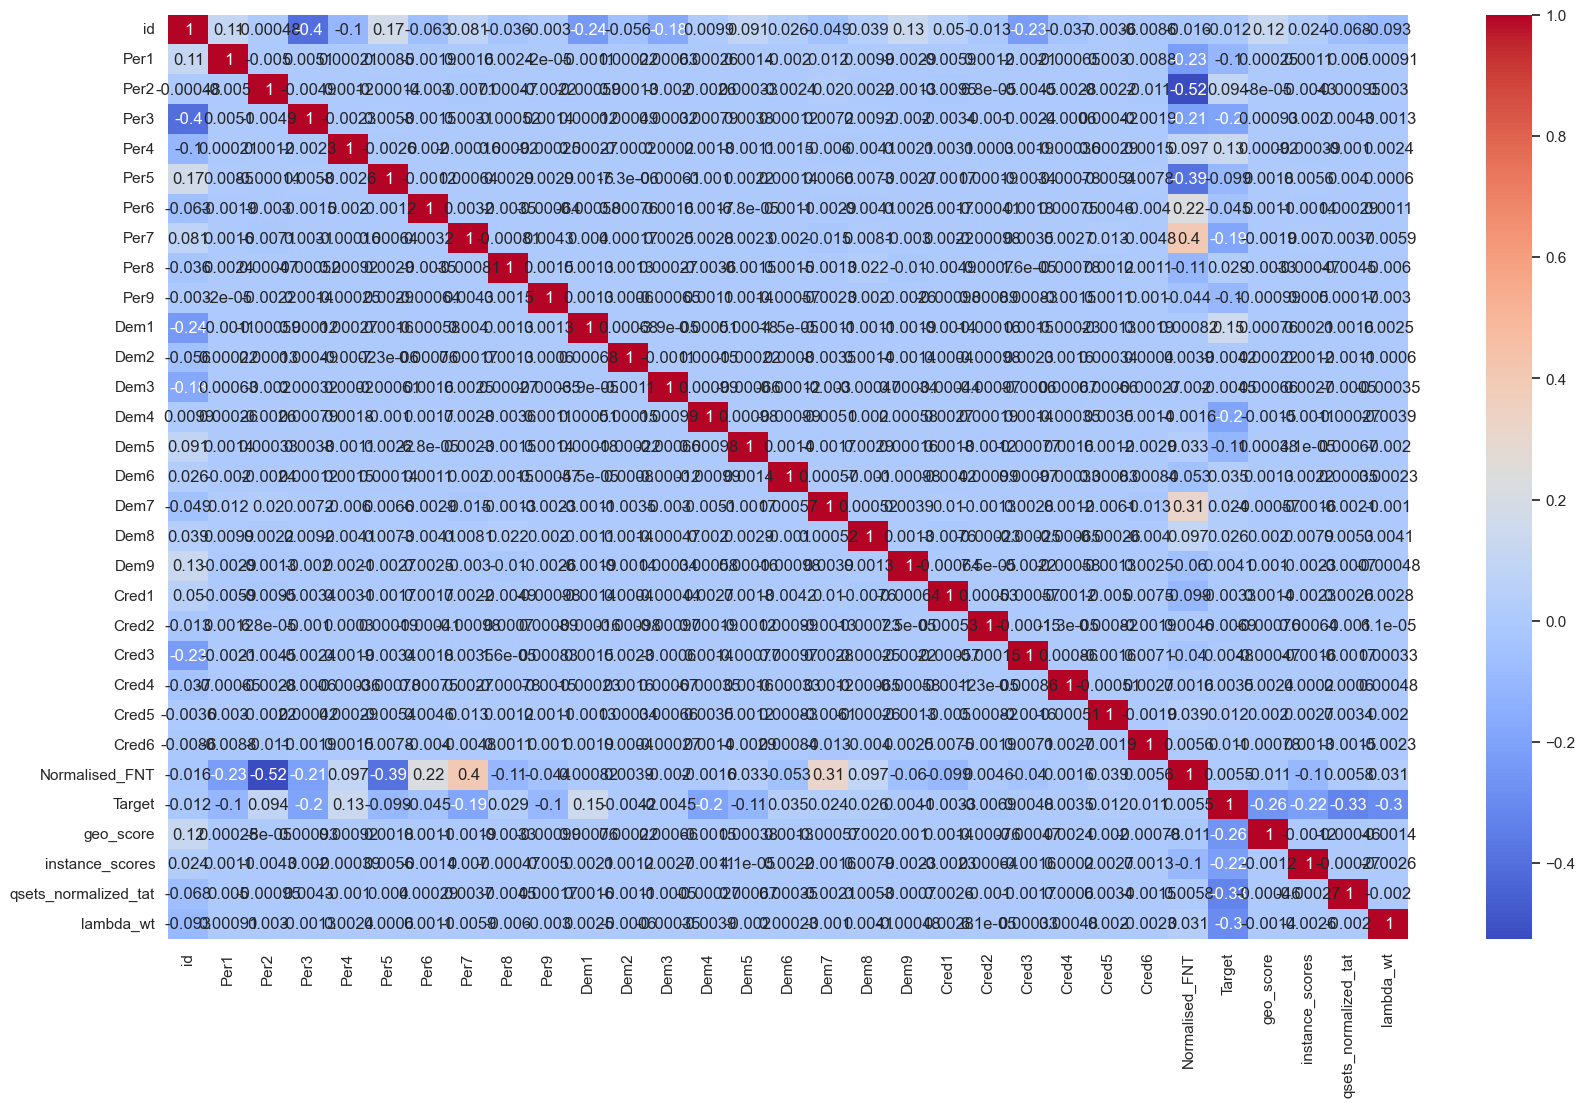

In [53]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [54]:
# splitting the data into independent and dependent variable
x = train_data.drop(['id', 'Group','Target', 'data'], axis=1) # ind variable
y = train_data['Target'] # dependent

In [55]:
x.head(2)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,0.863333,0.46,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.256,-0.06,-0.70,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,0.190000,0.47,...,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,-0.250,0.52,0.14,0.66


In [56]:
x.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [57]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [58]:
test_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [59]:
test_data.isnull().sum()/len(test_data)*100

id                        0.0
Group                     0.0
Per1                      0.0
Per2                      0.0
Per3                      0.0
Per4                      0.0
Per5                      0.0
Per6                      0.0
Per7                      0.0
Per8                      0.0
Per9                      0.0
Dem1                      0.0
Dem2                      0.0
Dem3                      0.0
Dem4                      0.0
Dem5                      0.0
Dem6                      0.0
Dem7                      0.0
Dem8                      0.0
Dem9                      0.0
Cred1                     0.0
Cred2                     0.0
Cred3                     0.0
Cred4                     0.0
Cred5                     0.0
Cred6                     0.0
Normalised_FNT            0.0
Target                  100.0
data                      0.0
geo_score                 0.0
instance_scores           0.0
qsets_normalized_tat      0.0
lambda_wt                 0.0
dtype: flo

In [60]:
test_data = test_data.drop(['id','Group','Target','data'], axis=1)

In [61]:
# Task : 
# This data is for prediction whether listed customer will do fraudulent or not
test_data.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


# **************** Actual Data ***************

In [62]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [63]:
x.isnull().any()

Per1                    False
Per2                    False
Per3                    False
Per4                    False
Per5                    False
Per6                    False
Per7                    False
Per8                    False
Per9                    False
Dem1                    False
Dem2                    False
Dem3                    False
Dem4                    False
Dem5                    False
Dem6                    False
Dem7                    False
Dem8                    False
Dem9                    False
Cred1                   False
Cred2                   False
Cred3                   False
Cred4                   False
Cred5                   False
Cred6                   False
Normalised_FNT          False
geo_score               False
instance_scores         False
qsets_normalized_tat    False
lambda_wt               False
dtype: bool

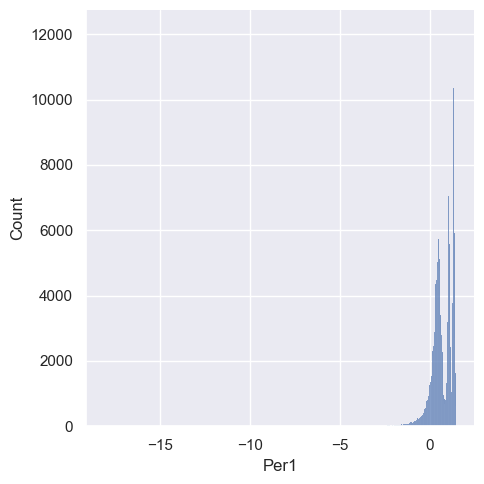

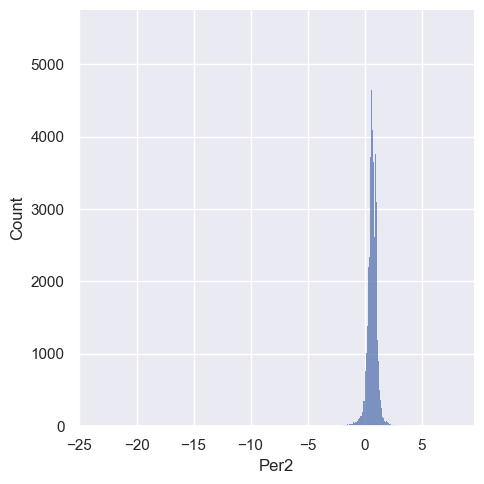

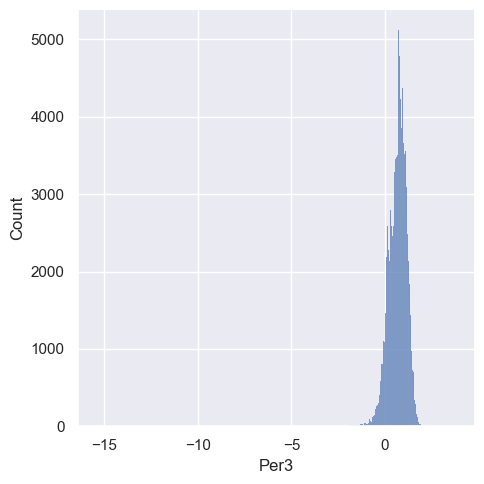

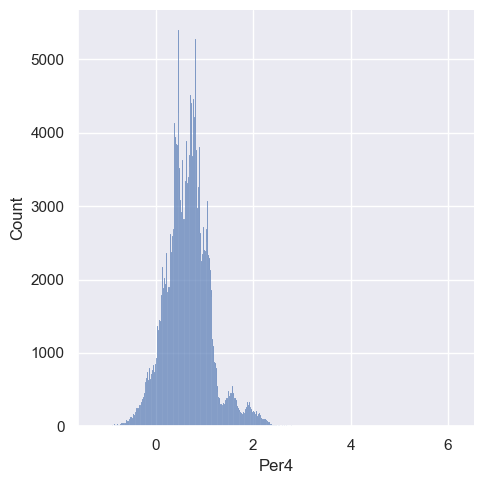

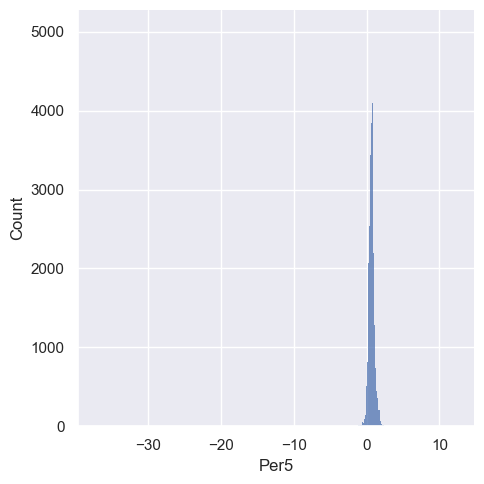

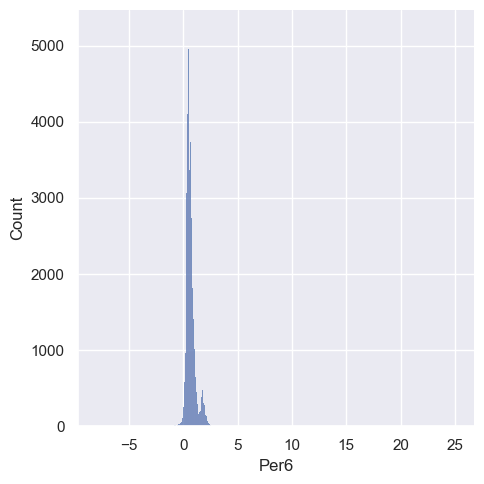

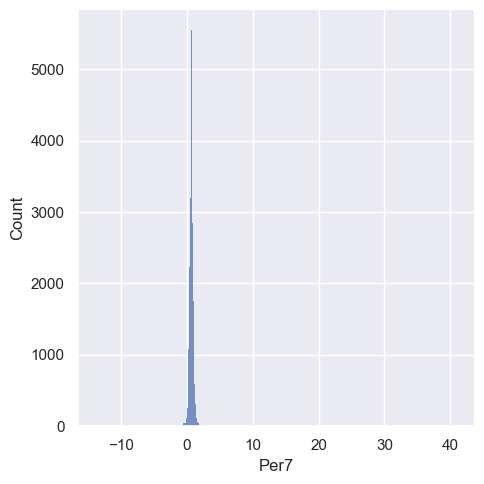

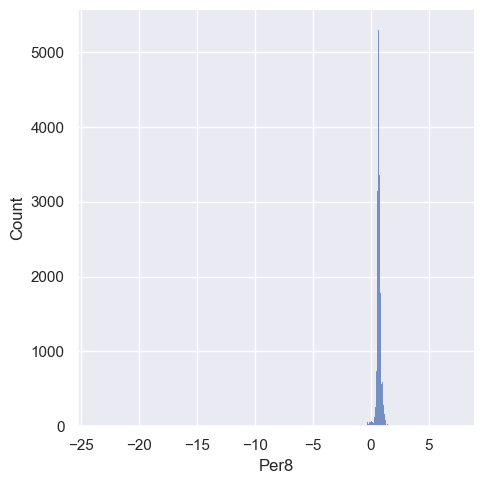

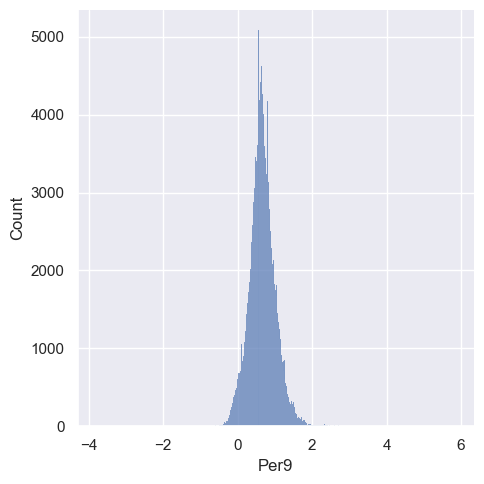

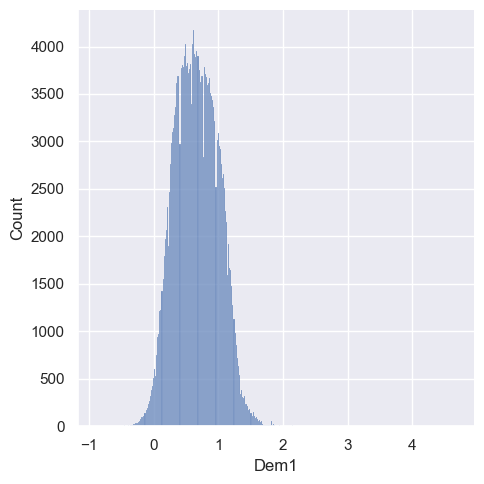

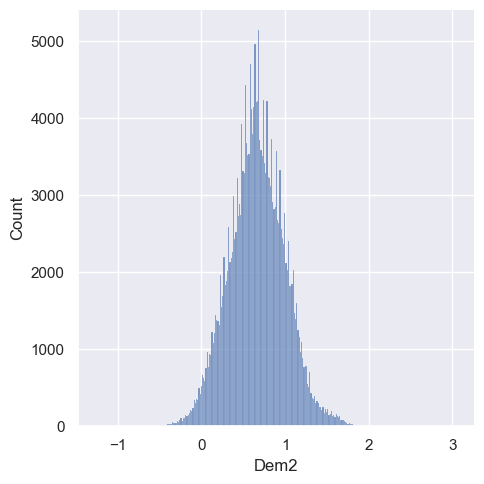

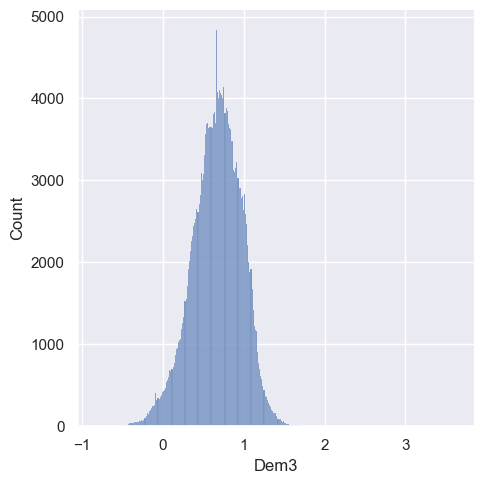

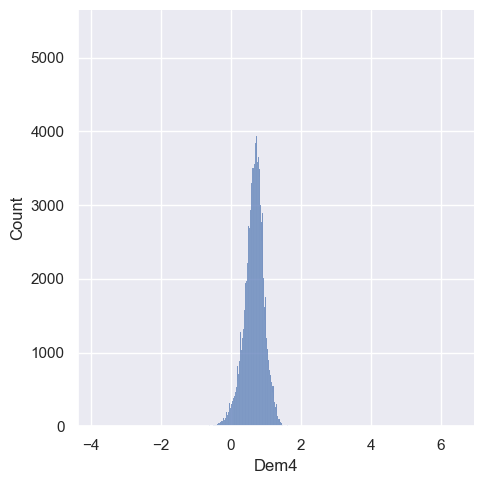

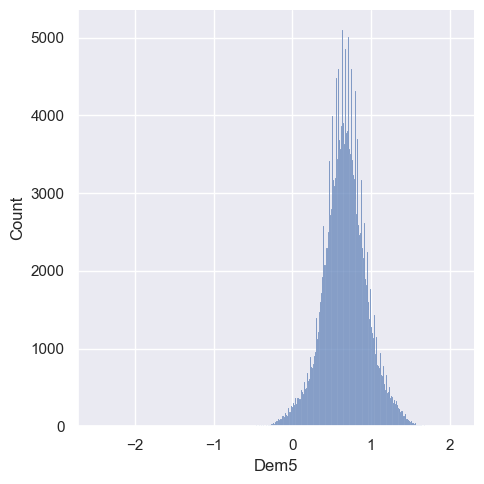

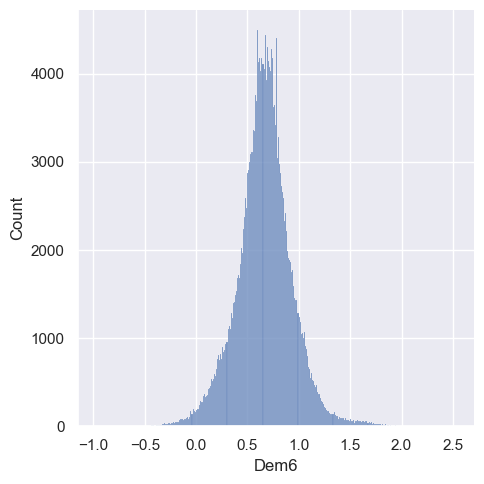

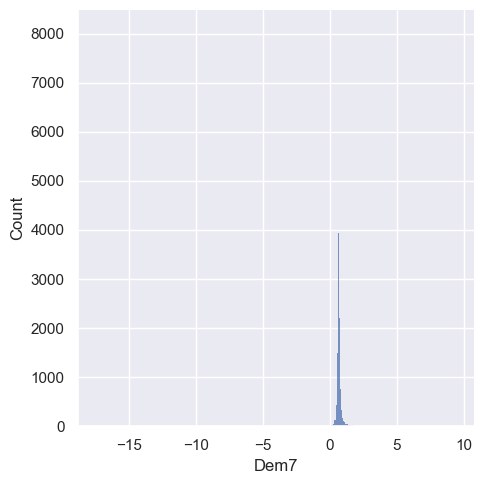

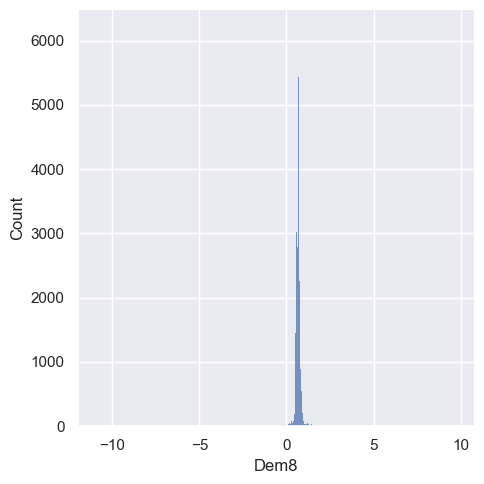

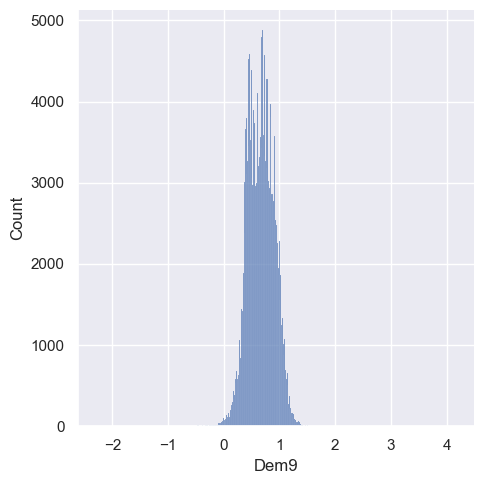

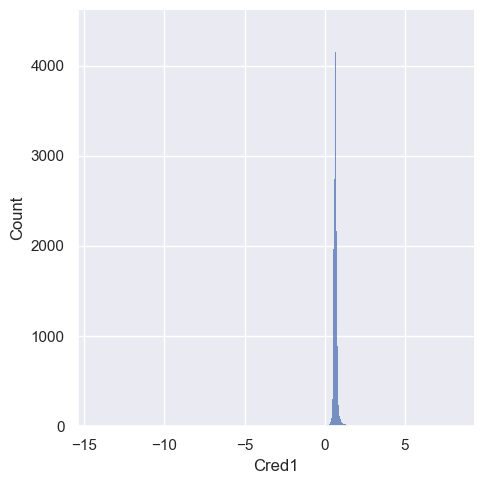

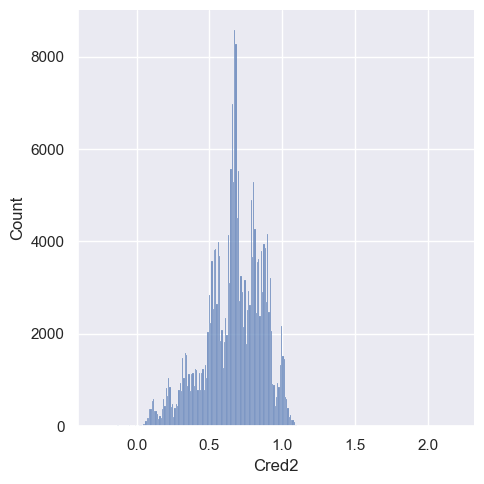

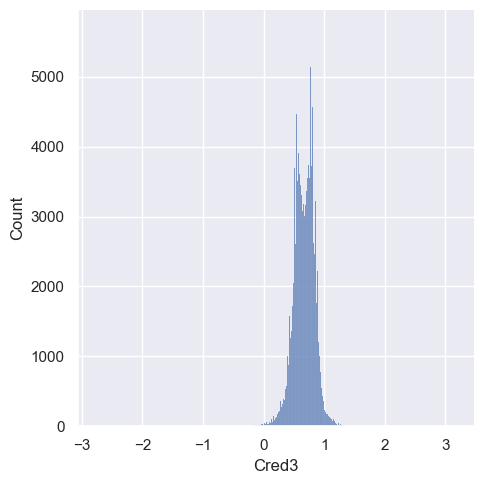

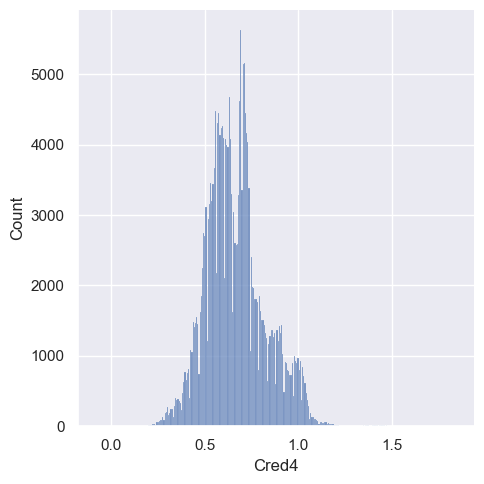

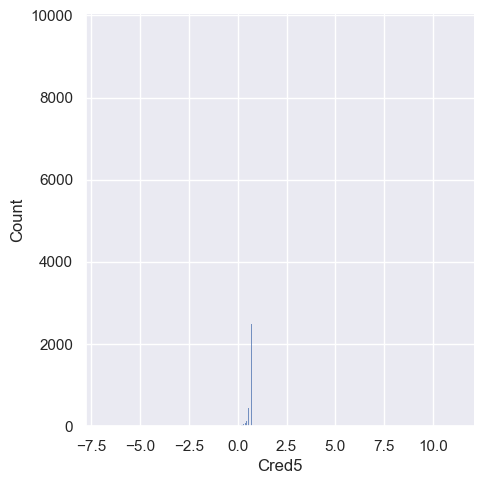

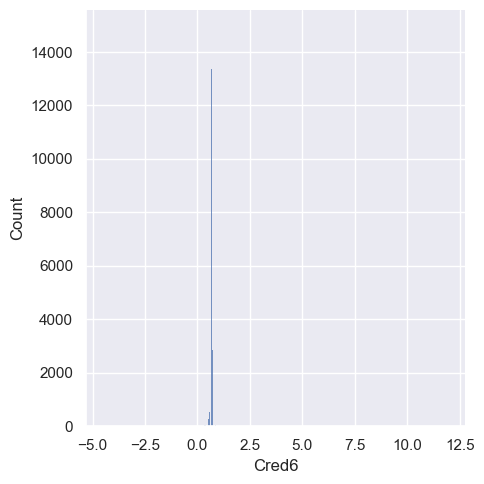

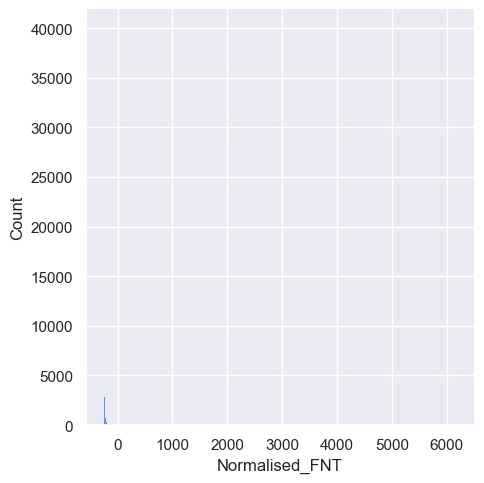

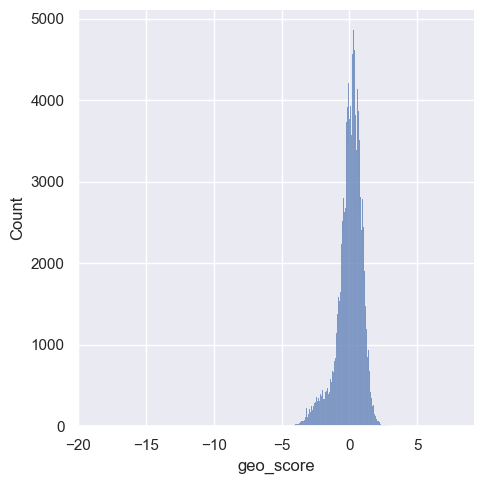

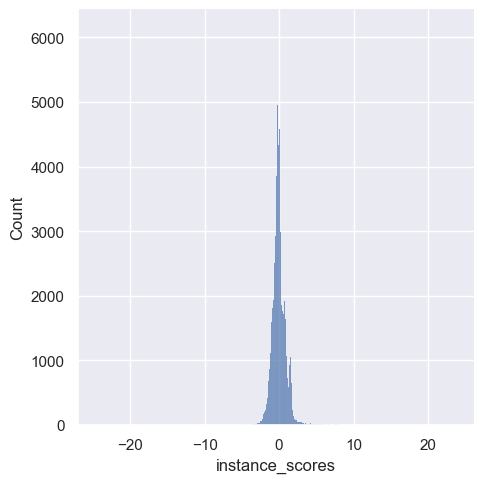

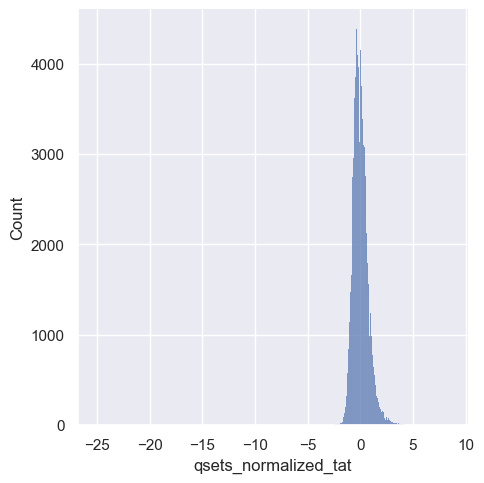

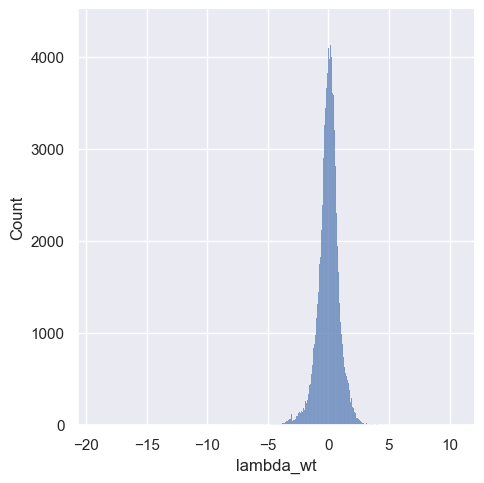

In [64]:
def distplots(col):
    sns.displot(x[col])
    plt.show()
    
for i in list(x.columns)[0:]:
    distplots(i)

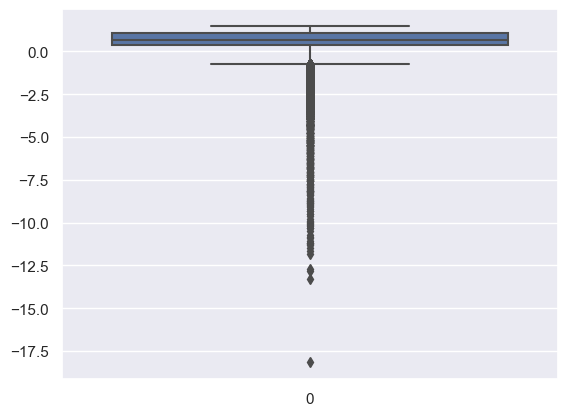

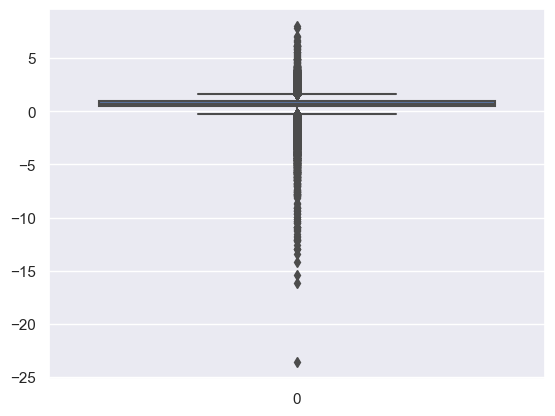

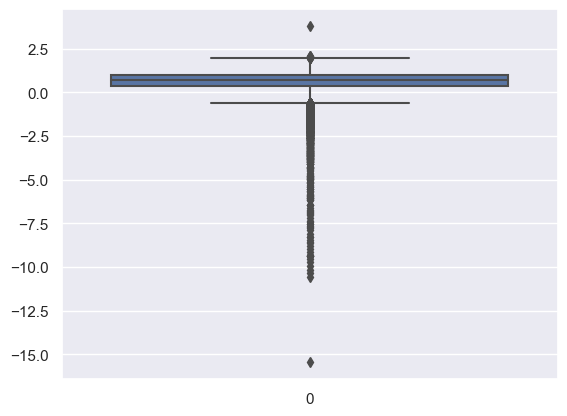

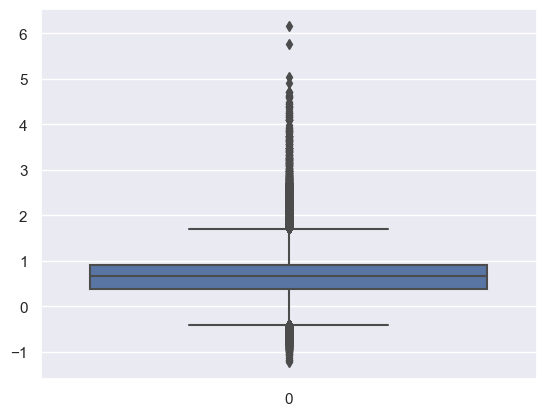

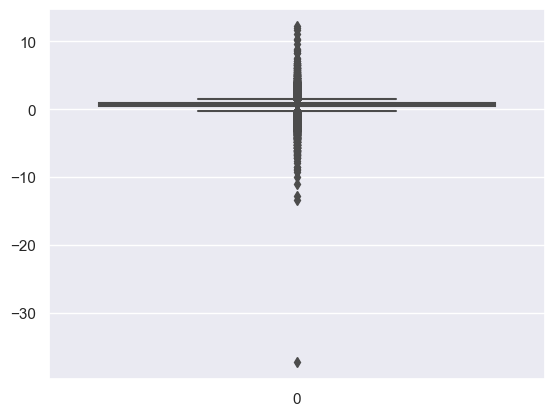

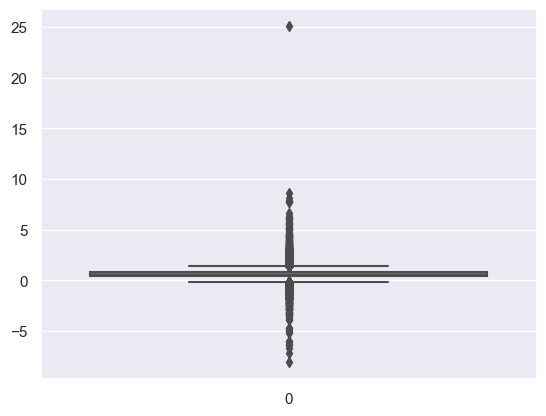

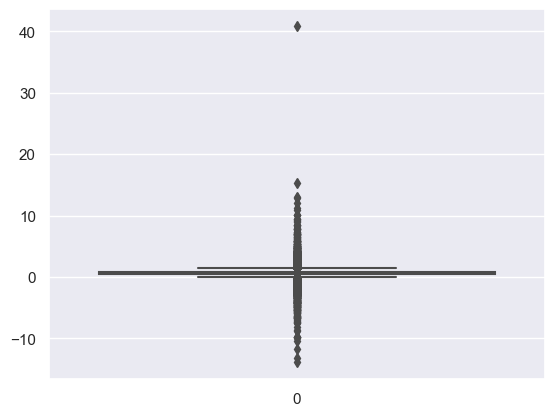

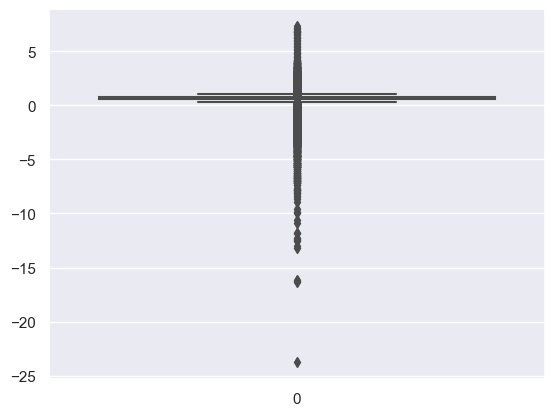

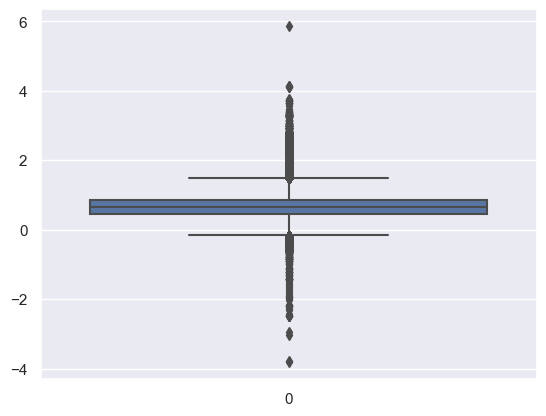

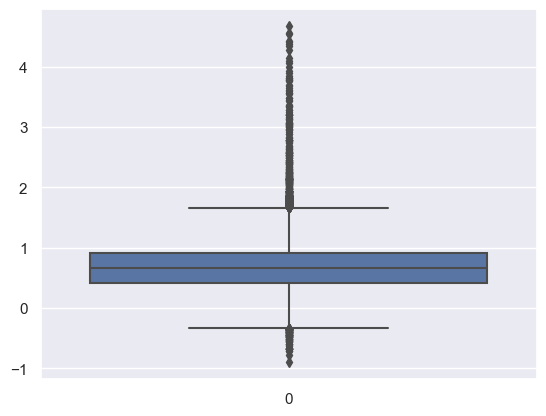

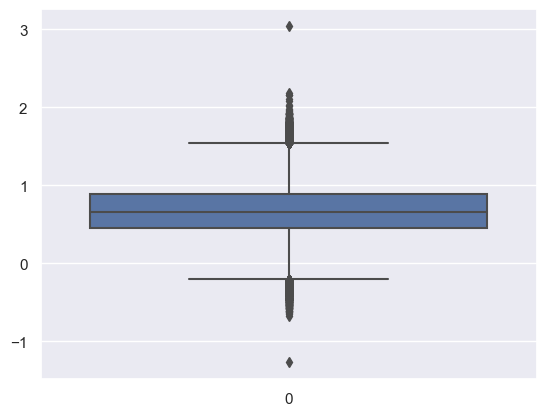

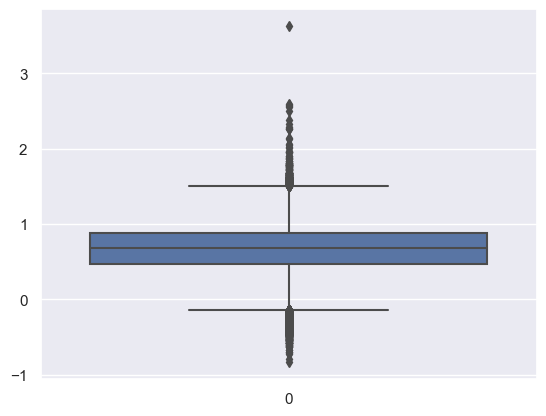

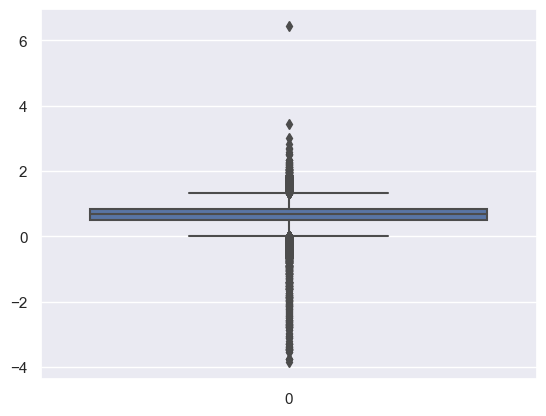

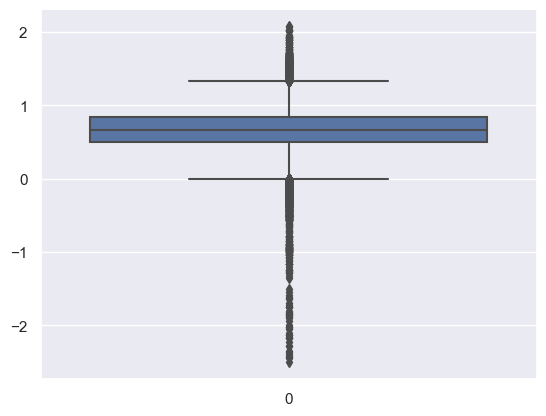

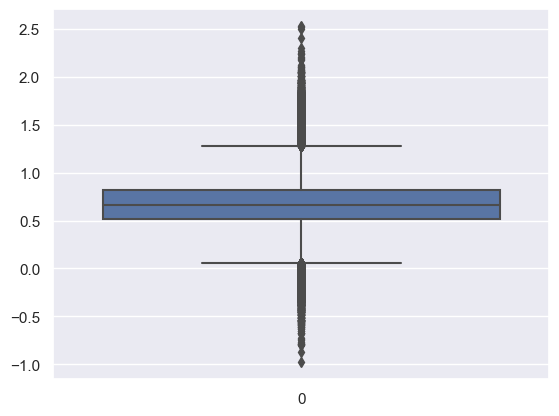

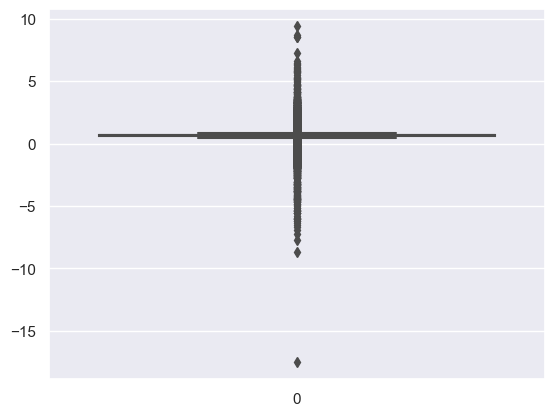

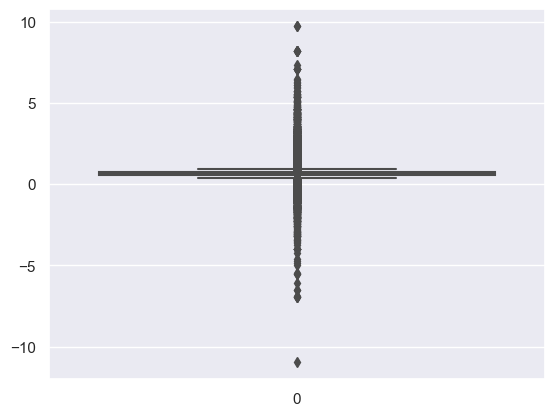

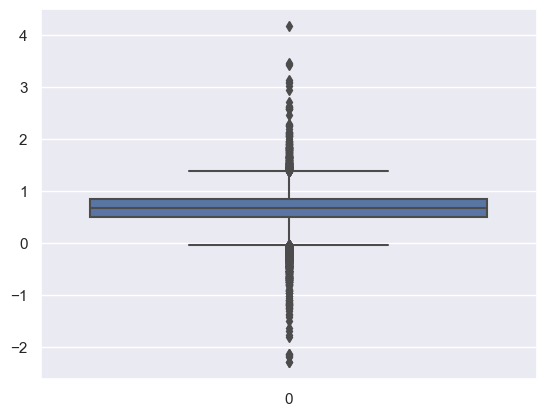

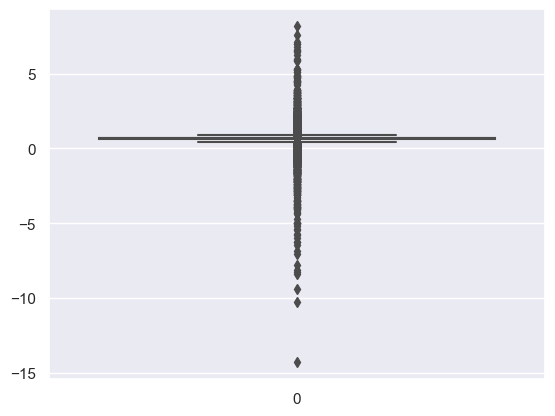

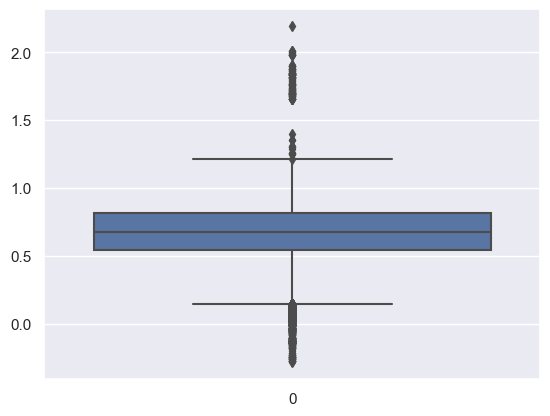

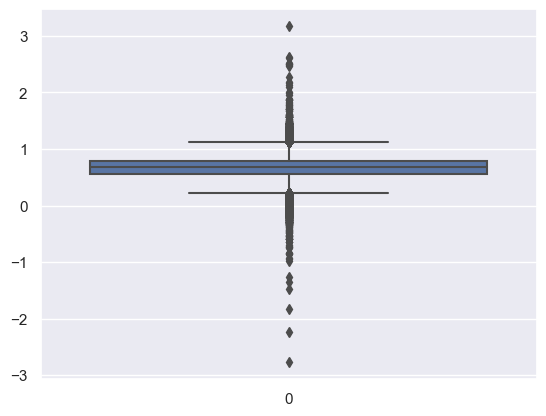

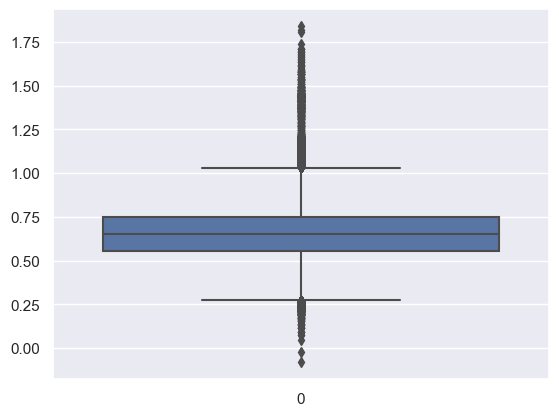

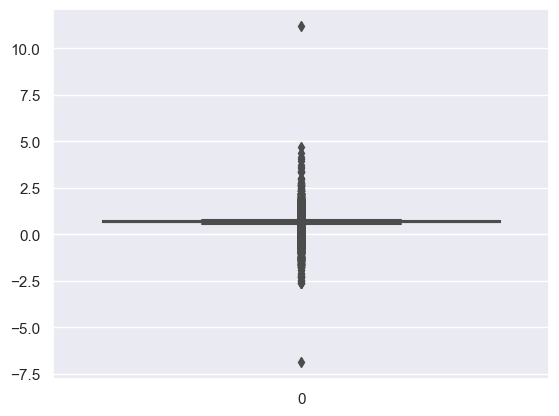

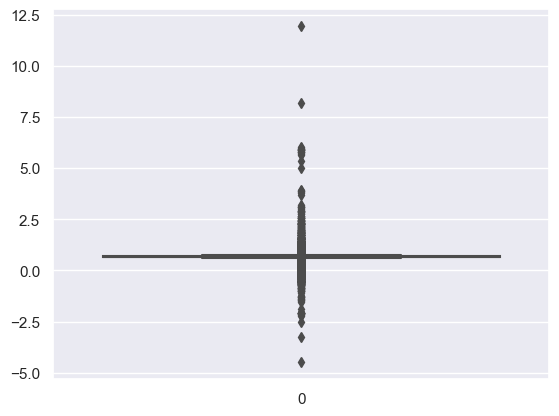

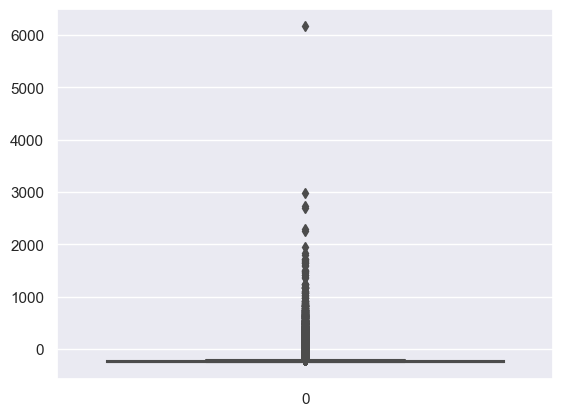

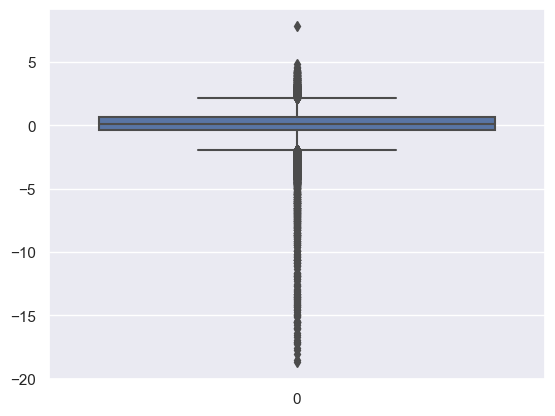

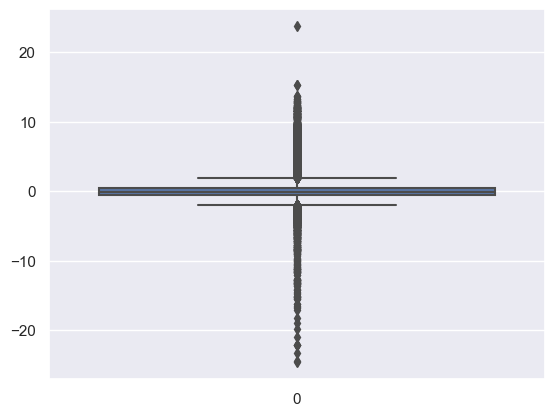

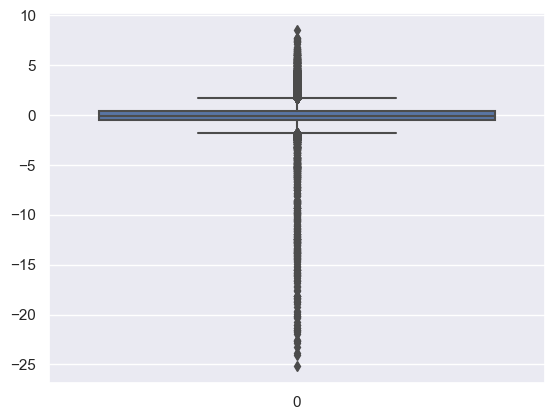

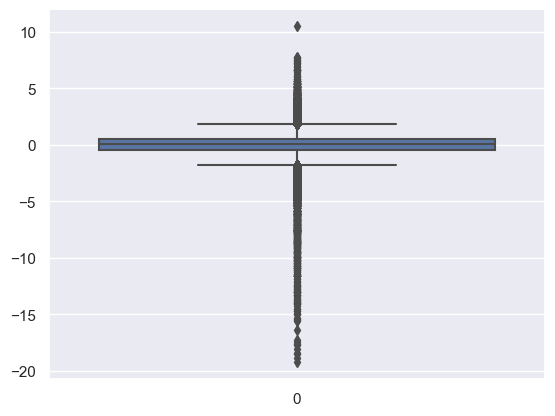

In [65]:
def boxplots(col):
    sns.boxplot(x[col])
    plt.show()
    
for i in list(x.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [66]:
# Outlier treament
"""
def check_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([.25, .75])
    IQR = Q3 -Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range
"""

'\ndef check_outlier(col):\n    sorted(col)\n    Q1,Q3 = col.quantile([.25, .75])\n    IQR = Q3 -Q1\n    lower_range = Q1 - 1.5 * IQR\n    upper_range = Q3 + 1.5 * IQR\n    return lower_range, upper_range\n'

In [68]:
#check_outlier(x['lambda_wt'])

# Capping the outliers treament

In [69]:
"""
def treat_outlier(x):
    # taking 5,25, 75,95
    q5 = np.percentile(x,5)
    q25 = np.percentile(x,25)
    q75 = np.percentile(x,75)
    q95 = np.percentile(x,95)
    # calculating IQR 
    IQR = q75 - q25
    # calculating minimum and max threshold value
    lower_bound = q25 - 1.5 * IQR
    upper_bound = q75 + 1.5 * IQR
    print(q5, q25, q75, q95, min, max)
    # apply capping method
    return x.apply(lambda y: q95 if y > upper_bound else y).apply(lambda y :q5 if y < lower_bound else y )
    
"""

'\ndef treat_outlier(x):\n    # taking 5,25, 75,95\n    q5 = np.percentile(x,5)\n    q25 = np.percentile(x,25)\n    q75 = np.percentile(x,75)\n    q95 = np.percentile(x,95)\n    # calculating IQR \n    IQR = q75 - q25\n    # calculating minimum and max threshold value\n    lower_bound = q25 - 1.5 * IQR\n    upper_bound = q75 + 1.5 * IQR\n    print(q5, q25, q75, q95, min, max)\n    # apply capping method\n    return x.apply(lambda y: q95 if y > upper_bound else y).apply(lambda y :q5 if y < lower_bound else y )\n    \n'

In [70]:
"""
for i in x:
    x[i] = treat_outlier(x[i])
"""

'\nfor i in x:\n    x[i] = treat_outlier(x[i])\n'

In [71]:
x.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.001346,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.850169,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.156000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,-0.066000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


In [72]:
# Feature Scaling - please check 
# Imbalance check
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [73]:
394/(394+227451)*100

0.17292457591783889

In [74]:
227451/(394+227451)*100

99.82707542408215

In [75]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)
# stratify=y - handling imbalance dataset

In [76]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(182276, 29) (45569, 29) (182276,) (45569,)


In [77]:
y_train.value_counts()

0.0    181961
1.0       315
Name: Target, dtype: int64

In [78]:
y_test.value_counts()

0.0    45490
1.0       79
Name: Target, dtype: int64

In [79]:
 315/394*100

79.94923857868021

# Model Building 

In [80]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression


# LogisticRegression

In [81]:
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))
print()
# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

[[181936     25]
 [   118    197]]

[[45484     6]
 [   31    48]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.89      0.63      0.73       315

    accuracy                           1.00    182276
   macro avg       0.94      0.81      0.87    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.89      0.61      0.72        79

    accuracy                           1.00     45569
   macro avg       0.94      0.80      0.86     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.99921547543286

Test Accuracy 0.999188044503939


In [82]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [83]:
outlier_fraction = 394 / (394+227451)
outlier_fraction

0.001729245759178389

# DecisionTree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dt = dtree.fit(x_train, y_train)
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_dt))
print()
print(confusion_matrix(y_test, y_pred_test_dt))
print()
# classification_report
print(classification_report(y_train, y_pred_train_dt))
print()
print(classification_report(y_test, y_pred_test_dt))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_dt))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_dt))

[[181961      0]
 [     0    315]]

[[45469    21]
 [   22    57]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.73      0.72      0.73        79

    accuracy                           1.00     45569
   macro avg       0.87      0.86      0.86     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 1.0

Test Accuracy 0.9990563760451184


# RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rf = rforest.fit(x_train, y_train)
y_pred_train_rf = rforest.predict(x_train)
y_pred_test_rf = rforest.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_rf))
print()
print(confusion_matrix(y_test, y_pred_test_rf))
print()
# classification_report
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_rf))

[[181961      0]
 [     2    313]]

[[45488     2]
 [   23    56]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.99      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.97      0.71      0.82        79

    accuracy                           1.00     45569
   macro avg       0.98      0.85      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9999890276284316

Test Accuracy 0.9994513814215804


# XGBoost Classifier

In [86]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgb = xgboost.fit(x_train, y_train)
y_pred_train_xgb = xgboost.predict(x_train)
y_pred_test_xgb = xgboost.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_xgb))
print()
print(confusion_matrix(y_test, y_pred_test_xgb))
print()
# classification_report
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_xgb))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_xgb))

[[181961      0]
 [     0    315]]

[[45488     2]
 [   22    57]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.97      0.72      0.83        79

    accuracy                           1.00     45569
   macro avg       0.98      0.86      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 1.0

Test Accuracy 0.9994733261647173


# Support Vector Maching 

In [87]:
from sklearn.svm import SVC
SVClass = SVC()
svm = SVClass.fit(x_train, y_train)
y_pred_train_svm = SVClass.predict(x_train)
y_pred_test_svm = SVClass.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_svm))
print()
print(confusion_matrix(y_test, y_pred_test_svm))
print()
# classification_report
print(classification_report(y_train, y_pred_train_svm))
print()
print(classification_report(y_test, y_pred_test_svm))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_svm))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_svm))

[[181936     25]
 [   207    108]]

[[45484     6]
 [   57    22]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.81      0.34      0.48       315

    accuracy                           1.00    182276
   macro avg       0.91      0.67      0.74    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.79      0.28      0.41        79

    accuracy                           1.00     45569
   macro avg       0.89      0.64      0.71     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9987272048980667

Test Accuracy 0.9986174811823828


# K Nearest Neighbors

# Naive Bayes Theorem

In [88]:
from sklearn.naive_bayes import BernoulliNB
bernb = BernoulliNB()
bnb = bernb.fit(x_train, y_train)
y_pred_train_bnb = bernb.predict(x_train)
y_pred_test_bnb = bernb.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_bnb))
print()
print(confusion_matrix(y_test, y_pred_test_bnb))
print()
# classification_report
print(classification_report(y_train, y_pred_train_bnb))
print()
print(classification_report(y_test, y_pred_test_bnb))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_bnb))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_bnb))

[[181595    366]
 [    95    220]]

[[45387   103]
 [   29    50]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.38      0.70      0.49       315

    accuracy                           1.00    182276
   macro avg       0.69      0.85      0.74    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.33      0.63      0.43        79

    accuracy                           1.00     45569
   macro avg       0.66      0.82      0.71     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.997470868353486

Test Accuracy 0.9971032939059449


# Voting Classifier

In [89]:
from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('logit', lr ),('dtree', dt),('rforest', rf),('xgboost', xgb),
                                     ("svm", svm),("bnb",bnb)])
voting_evc = voting.fit(x_train, y_train)
y_pred_train_voting = voting.predict(x_train)
y_pred_test_voting = voting.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_voting))
print()
print(confusion_matrix(y_test, y_pred_test_voting))
print()
# classification_report
print(classification_report(y_train, y_pred_train_voting))
print()
print(classification_report(y_test, y_pred_test_voting))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_voting))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_voting))

[[181961      0]
 [    78    237]]

[[45488     2]
 [   28    51]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.75      0.86       315

    accuracy                           1.00    182276
   macro avg       1.00      0.88      0.93    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.96      0.65      0.77        79

    accuracy                           1.00     45569
   macro avg       0.98      0.82      0.89     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9995720775088328

Test Accuracy 0.9993416577058966


In [91]:
accuracy_logit = accuracy_score(y_test, y_pred_test)
accuracy_dtree = accuracy_score(y_test, y_pred_test_dt)
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
accuracy_bnb = accuracy_score(y_test, y_pred_test_bnb)
accuracy_voting = accuracy_score(y_test, y_pred_test_voting)

  Method Used  Accuracy
0    Logistic  0.999188
1       Dtree  0.999056
2     RForest  0.999451
3     XGBoost  0.999473
4         SVM  0.998617
5         BNB  0.997103
6      Voting  0.999342
Axes(0.125,0.11;0.775x0.77)


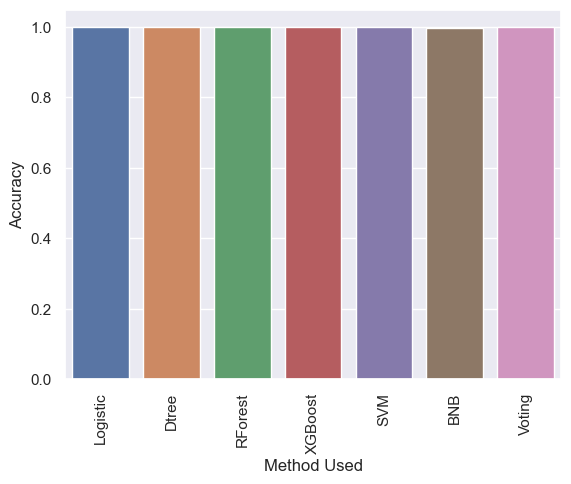

In [92]:
point1 = ["Logistic", 'Dtree','RForest','XGBoost','SVM','BNB','Voting']
point2 = [accuracy_logit,accuracy_dtree,accuracy_rf,accuracy_xgb,accuracy_svm,accuracy_bnb,accuracy_voting]

final_output = pd.DataFrame({"Method Used": point1, "Accuracy":point2})
print(final_output)

# visualization

chart = sns.barplot(x="Method Used", y="Accuracy", data=final_output)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [93]:
# Tomorrow Target
# Anomaly Detection model
## Stacking method
## Isolation Forest 
## Local Outlier Factor
## OneSVM

## MLP - MultiLayerPerceptron / DNN

# Stacking method

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [95]:
estimators = [('rf', RandomForestClassifier()),
             ('gdbt',GradientBoostingClassifier()),
             ('nbt',BernoulliNB())]

In [96]:
from sklearn.ensemble import StackingClassifier

In [97]:
classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),
                               cv=3)

In [98]:
classifier.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('rf', RandomForestClassifier()),
                               ('gdbt', GradientBoostingClassifier()),
                               ('nbt', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [99]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [100]:
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))
print()
# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

[[181961      0]
 [    56    259]]

[[45487     3]
 [   27    52]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.82      0.90       315

    accuracy                           1.00    182276
   macro avg       1.00      0.91      0.95    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.66      0.78        79

    accuracy                           1.00     45569
   macro avg       0.97      0.83      0.89     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9996927735960851

Test Accuracy 0.9993416577058966


# Anomaly Detection - Isolation Forest Classifier

In [101]:
from sklearn.ensemble import IsolationForest

In [102]:
isolation = IsolationForest(contamination=outlier_fraction)
isolation.fit(x_train, y_train)

IsolationForest(contamination=0.001729245759178389)

In [103]:
anomaly_pred_train = isolation.predict(x_train)
anomaly_pred_test = isolation.predict(x_test)

In [104]:
pd.DataFrame(anomaly_pred_test).value_counts()

 1    45500
-1       69
dtype: int64

In [105]:
# Confusion Matrix
print(confusion_matrix(y_train, anomaly_pred_train))
print()
print(confusion_matrix(y_test, anomaly_pred_test))
print()
# classification_report
print(classification_report(y_train, anomaly_pred_train))
print()
print(classification_report(y_test, anomaly_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, anomaly_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, anomaly_pred_test))

[[     0      0      0]
 [   239      0 181722]
 [    77      0    238]]

[[    0     0     0]
 [   53     0 45437]
 [   16     0    63]]

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    181961
         1.0       0.00      0.76      0.00       315

    accuracy                           0.00    182276
   macro avg       0.00      0.25      0.00    182276
weighted avg       0.00      0.00      0.00    182276


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     45490
         1.0       0.00      0.80      0.00        79

    accuracy                           0.00     45569
   macro avg       0.00      0.27      0.00     45569
weighted avg       0.00      0.00      0.00     45569


Train Accuracy 0.0013057122166385043

Test Accuracy 0.0013825188176172399


In [106]:
#iso_model = IsolationForest(contamination=0.001)
#iso_model.fit(x_train, y_train)
#anomaly_pred = iso_model.predict(x_test)

for i, x in enumerate(x_test):
    if anomaly_pred_test[i] == 1:
        print(f"Anomaly Detected:{x}")
    else:
        print(f"Normal Transaction:{x}")

Anomaly Detected:Per1
Anomaly Detected:Per2
Anomaly Detected:Per3
Anomaly Detected:Per4
Anomaly Detected:Per5
Anomaly Detected:Per6
Anomaly Detected:Per7
Anomaly Detected:Per8
Anomaly Detected:Per9
Anomaly Detected:Dem1
Anomaly Detected:Dem2
Anomaly Detected:Dem3
Anomaly Detected:Dem4
Anomaly Detected:Dem5
Anomaly Detected:Dem6
Anomaly Detected:Dem7
Anomaly Detected:Dem8
Anomaly Detected:Dem9
Anomaly Detected:Cred1
Anomaly Detected:Cred2
Anomaly Detected:Cred3
Anomaly Detected:Cred4
Anomaly Detected:Cred5
Anomaly Detected:Cred6
Anomaly Detected:Normalised_FNT
Anomaly Detected:geo_score
Anomaly Detected:instance_scores
Anomaly Detected:qsets_normalized_tat
Anomaly Detected:lambda_wt


In [107]:
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.svm import OneClassSVM

In [108]:
OneClassSVM()

OneClassSVM()

In [109]:
len(x)

9

In [110]:
final_classification_model = {"IsolationForest": IsolationForest(n_estimators=100,contamination=outlier_fraction, max_samples=len(x)),
                                                                "LocalOutlierFactor" : LocalOutlierFactor(contamination=outlier_fraction),
                                                                "OneClassSVM" : OneClassSVM()}

In [111]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [112]:
test_data.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [113]:
fraud = train_data[train_data['Target']==1]
normal = train_data[train_data['Target']==0]

In [114]:
 len(fraud)

394

In [115]:
total_outlier_found = len(fraud)

for i , (clf_name, clf) in enumerate(final_classification_model.items()):
    if clf_name =="LocalOutlierFactor" :
        y_pred = clf.fit_predict(x_test)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="OneClassSVM":
        clf.fit(x_train)
        y_pred = clf.predict(x_test)
    
    else:
        clf.fit(x_train)
        score_prediction = clf.decision_function(x_train)
        y_pred = clf.predict(x_test)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_error = (y_pred !=y_test).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y_test, y_pred))

IsolationForest : 119
Accuracy Score :
0.997388575566723
LocalOutlierFactor : 120
Accuracy Score :
0.9973666308235862
OneClassSVM : 22773
Accuracy Score :
0.500252364546073
